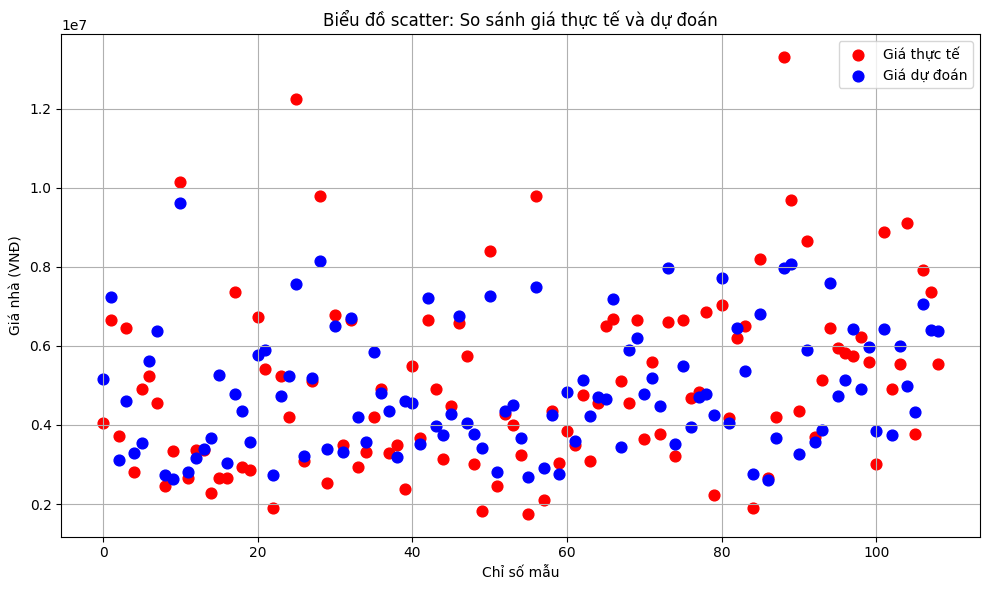

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Đọc dữ liệu
data = pd.read_csv("housing_data.csv")

# 2. One-hot encoding cho các biến phân loại
categorical_cols = [
    "mainroad", "guestroom", "basement", "hotwaterheating",
    "airconditioning", "prefarea", "furnishingstatus"
]
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 3. Tách X và y
X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]

# 4. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Vẽ biểu đồ scatter (X: chỉ số mẫu, Y: giá)
sample_indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(sample_indices, y_test.values, color="red", label="Giá thực tế", s=60)
plt.scatter(sample_indices, y_pred, color="blue", label="Giá dự đoán", s=60)
plt.title("Biểu đồ scatter: So sánh giá thực tế và dự đoán")
plt.xlabel("Chỉ số mẫu")
plt.ylabel("Giá nhà (VNĐ)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
